In [1]:
import pandas as pd
import feather
import numpy as np
import csv
import datetime
from altair import *
import numpy as np
import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [2]:
fieldnames = ["o_text", "text", "author_id", "region", "city", "groups", "likes", "sex",
              "res_comments_likes", "res_comments", "res_postlikes",
              "friends", "followers", "posts", "comments",
              "post_comments", "post_likes", "post_repost"]

In [19]:
data = pd.read_csv("/Volumes/BigData/Science/hse_thesis/metadata_for_every_post_and_merged_texts/aggregated_texts.csv",
                               names=fieldnames, sep=";", quoting=csv.QUOTE_ALL, index_col=False)

In [4]:
data.shape

(239732, 18)

In [8]:
data.head()

,o_text,text,author_id,region,city,groups,likes,sex,res_comments_likes,res_comments,res_postlikes,friends,followers,posts,comments,post_comments,post_likes,post_repost
0,Вы уже обзавелись новогодним настроением ?????...,{обзаводиться} {новогодний} {настроение} {прио...,3276812,Тюменская область,Тюмень,225.0,0.0,1.0,0.0,0.0,0.0,183.0,13.0,3.0,0.0,0.0,0.0,0.0
1,8 марта• Красивые картинки и открытки vk.com/...,{март} {красивый} {картинка} {открытка} {vk} {...,112984077,Коми,Визинга,8.0,0.0,1.0,0.0,0.0,12.0,120.0,55.0,16.0,0.0,0.0,12.0,0.0
2,Привет! Я оценил тебя тут: ¦¦¦ vk.com/app6866...,{оценивать} {vk} {играть} {разгадайка} {присое...,181727714,Липецкая область,Чаплыгин,15.0,0.0,2.0,0.0,0.0,0.0,28.0,9.0,7.0,0.0,0.0,0.0,0.0
3,"Вау! Я считаю, что ты намного круче, чем друго...",{вау} {считать} {намного} {крутой} {vk} {kryyt...,84672530,Орловская область,Орёл,0.0,1.0,1.0,0.0,0.0,8.0,16.0,10.0,11.0,0.0,0.0,8.0,0.0
4,МегаТест: Насколько % ты знаешь My little pony...,{мегатест} {насколько} {pony} {бронь} {тест} {...,269877267,Вологодская область,Вологда,7.0,0.0,1.0,0.0,0.0,1.0,51.0,9.0,12.0,0.0,0.0,1.0,0.0


In [3]:
docID_prob_tm1 = pd.read_csv("/Volumes/BigData/Science/hse_thesis/report/docID-prob_tm1.csv",
                             sep=";", decimal=",", encoding="CP1251")

In [4]:
docID_prob_tm1.shape

(239732, 174)

In [10]:
docID_prob_tm1.head()

,words_count,author_id,region,city,groups,likes,sex,res_comments_likes,res_comments,res_postlikes,friends,followers,posts,comments,post_comments,post_likes,post_repost,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69,topic_70,topic_71,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79,topic_80,topic_81,topic_82,topic_83,topic_84,topic_85,topic_86,topic_87,topic_88,topic_89,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99,topic_100,topic_101,topic_102,topic_103,topic_104,topic_105,topic_106,topic_107,topic_108,topic_109,topic_110,topic_111,topic_112,topic_113,topic_114,topic_115,topic_116,topic_117,topic_118,topic_119,topic_120,topic_121,topic_122,topic_123,topic_124,topic_125,topic_126,topic_127,topic_128,topic_129,topic_130,topic_131,topic_132,topic_133,topic_134,topic_135,topic_136,topic_137,topic_138,topic_139,topic_140,topic_141,topic_142,topic_143,topic_144,topic_145,topic_146,topic_147,topic_148,topic_149
0,97,3276812,Тюменская область,Тюмень,225.0,0.0,1.0,0.0,0.0,0.0,183.0,13.0,3.0,0.0,0.0,0.0,0.0,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01799,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.29856,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.01079,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.03237,0.00360,0.00360,0.00360,0.01799,0.00360,0.00360,0.00360,0.00360,0.01079,0.01799,0.00360,0.00360,0.00360,0.00360,0.00360,0.01079,0.00360,0.00360,0.00360
1,103,112984077,Коми,Визинга,8.0,0.0,1.0,0.0,0.0,12.0,120.0,55.0,16.0,0.0,0.0,12.0,0.0,0.00276,0.00276,0.00276,0.00276,0.00829,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00829,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.45028,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00829,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00829,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00276,0.00829,0.00276,0.01934,0.00276,0.00276,0.01

In [6]:
docID_prob_tm1.drop(["ID document", "Unnamed: 173", "Field16", "Field17", "Field18", "Field19", "Field20"], axis=1, inplace=True)

In [7]:
docID_prob_tm1_fields = ["words_count", "author_id", "region", "city", "groups", "likes", "sex",
              "res_comments_likes", "res_comments", "res_postlikes",
              "friends", "followers", "posts", "comments",
              "post_comments", "post_likes", "post_repost"] + ["topic_" + str(i) for i in range(150)]
len(docID_prob_tm1_fields)

167

In [9]:
docID_prob_tm1.columns = docID_prob_tm1_fields

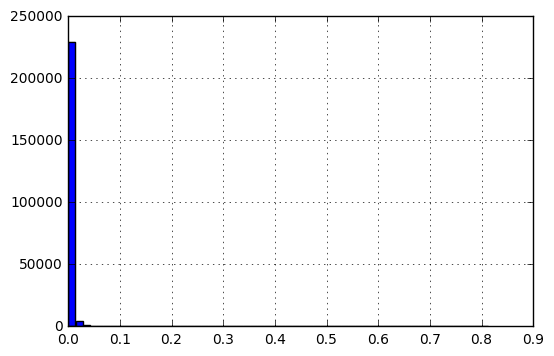

In [55]:
docID_prob_tm1["topic_1"].hist(bins=60)

In [11]:
docID_prob_tm1["topic_1"][docID_prob_tm1["topic_1"] > 0.1].shape

(3068,)

In [12]:
num_fields = ["groups", "likes",
              "res_comments_likes", "res_comments", "res_postlikes",
              "friends", "followers", "posts", "comments",
              "post_comments", "post_likes", "post_repost"]
for i in docID_prob_tm1.columns:
    if i in num_fields:
        docID_prob_tm1[i] = pd.to_numeric(docID_prob_tm1[i])

In [13]:
agg_dict = {
    "words_count": "sum", "region": "first", "city": "first", "groups": "sum", "likes": "sum", "sex": "first",
    "res_comments_likes": "sum", "res_comments": "sum", "res_postlikes": "sum",
    "friends": "sum", "followers": "sum", "posts": "sum", "comments": "sum",
    "post_comments": "sum", "post_likes": "sum", "post_repost": "sum"
}
topics_names_dict = {}
for num in range(150):
    topics_names_dict["topic_" + str(num)] = "mean"
final_agg_dict = {**agg_dict, **topics_names_dict}
len(final_agg_dict)

166

In [14]:
agg_author = docID_prob_tm1.groupby("author_id").agg(final_agg_dict)

In [15]:
agg_author.head()

,topic_142,topic_68,topic_110,topic_8,topic_119,topic_73,followers,topic_128,topic_52,topic_47,topic_130,topic_135,topic_146,topic_24,topic_23,res_comments_likes,words_count,topic_64,topic_51,topic_21,topic_35,topic_17,topic_14,topic_126,topic_65,topic_107,topic_83,topic_134,topic_13,posts,topic_102,topic_116,topic_113,topic_7,topic_125,topic_38,topic_141,topic_31,topic_1,topic_127,topic_49,topic_140,topic_4,topic_96,topic_39,topic_56,topic_36,topic_98,topic_72,topic_106,topic_93,topic_139,topic_32,topic_76,topic_82,topic_18,topic_43,topic_148,topic_22,topic_40,topic_50,sex,topic_132,topic_16,topic_101,topic_147,topic_94,post_likes,topic_85,topic_15,topic_112,topic_69,topic_145,likes,topic_131,topic_77,topic_121,topic_138,topic_37,region,topic_115,topic_57,topic_95,topic_97,topic_70,topic_111,topic_84,topic_29,topic_78,res_comments,topic_46,topic_10,groups,topic_12,topic_117,topic_74,topic_2,topic_60,topic_5,topic_86,topic_118,topic_100,topic_3,topic_63,topic_27,topic_55,topic_136,topic_90,topic_54,topic_122,topic_137,topic_48,post_repost,topic_71,topic_75,topic_79,friends,topic_30,topic_61,topic_99,topic_123,topic_109,topic_103,topic_6,topic_67,topic_62,topic_11,topic_105,topic_149,city,topic_19,comments,topic_20,topic_53,topic_81,topic_89,topic_25,topic_41,topic_92,topic_80,topic_144,topic_133,topic_34,res_postlikes,topic_87,post_comments,topic_114,topic_108,topic_59,topic_66,topic_44,topic_26,topic_0,topic_9,topic_58,topic_42,topic_45,topic_120,topic_91,topic_129,topic_28,topic_33,topic_124,topic_143,topic_104,topic_88
author_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9293,0.053503,0.006404,0.006754,0.009212,0.003371,0.004200,3104.0,0.003095,0.009856,0.004578,0.005583,0.004933,0.002602,0.004152,0.003219,224.0,18247,0.012504,0.003113,0.004508,0.001416,0.013517,0.003998,0.004322,0.035367,0.002121,0.002194,0.005901,0.006235,11520.0,0.002117,0.002903,0.010187,0.002820,0.003416,0.009456,0.003611,0.002314,0.010872,0.008413,0.003635,0.006035,0.008875,0.005013,0.005876,0.005519,0.079132,0.002519,0.004869,0.024628,0.002825,0.001982,0.003680,0.002302,0.002857,0.004764,0.002657,0.004819,0.002433,0.003664,0.011978,1.0,0.007066,0.002479,0.003664,0.002267,0.021865,296.0,0.004121,0.004122,0.005618,0.005449,0.003589,3488.0,0.006427,0.003698,0.004920,0.012544,0.002753,Сахалинская область,0.004936,0.028246,0.003423,0.002557,0.003013,0.005112,0.003187,0.003610,0.003597,4576.0,0.002109,0.006088,2464.0,0.003663,0.005103,0.002588,0.002152,0.012026,0.003933,0.003501,0.013283,0.002955,0.004716,0.007697,0.006986,0.003368,0.003646,0.001692,0.015143,0.003289,0.010242,0.047040,75.0,0.004222,0.006267,0.002477,4128.0,0.020944,0.004546,0.003603,0.002321,0.003384,0.001623,0.008296,0.006213,0.002257,0.003543,0.001998,0.001422,Южно-Сахалинск,0.004249,2784.0,0.002967,0.018508,0.005179,0.003652,0.001991,0.003293,0.003598,0.006871,0.010707,0.003728,0.004349,19104.0,0.011455,63.0,0.011402,0.001565,0.001510,0.002767,0.004705,0.002998,0.002985,0.002829,0.004282,0.002026,0.003417,0.006460,0.002619,0.001940,0.002202,0.003378,0.002374,0.003074,0.005733,0.005899
23835,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,1341.0,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.0,225,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,25.0,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.007390,0.002460,0.002460,0.002460,0.002460,0.002460,0.613300,0.002460,0.007390,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,1.0,0.002460,0.002460,0.002460,0.002460,0.002460,0.0,0.002460,0.002460,0.002460,0.002460,0.002460,3.0,0.002460,0.002460,0.002460,0.002460,0.002460,Санкт-Петербург,0.002460,0.007390,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.002460,0.0,0.002460,

In [16]:
len(agg_author)

36396

In [17]:
len(agg_author["topic_1"][(agg_author["topic_1"] > 0.01) & agg_author["topic_1"]])

1648

In [96]:
for region in agg_author["region"].unique():
    region_data = agg_author[agg_author["region"] == region]
    print(region, region_data["topic_1"].mean())
    

Сахалинская область 0.00589102647534
Санкт-Петербург 0.00361021771175
Архангельская область 0.0036106474829
Тюменская область 0.00441012873763
Вологодская область 0.00369919015827
Тульская область 0.00346715285587
Иркутская область 0.00412495694753
Забайкальский край 0.00693749521819
Новгородская область 0.00326703665092
Кировская область 0.00400892571809
Москва 0.00357746144316
Ленинградская область 0.00355857638266
Липецкая область 0.00435073057131
Воронежская область 0.00513134010011
Коми 0.00421060452072
Владимирская область 0.00466973240462
Ставропольский край 0.00584672251992
Татарстан 0.0039643828703
Томская область 0.00504905050011
Нижегородская область 0.00399718709749
Московская область 0.00451084401157
Карелия 0.00385951807902
Калужская область 0.00372549982558
Севастопольский городской совет 0.00390767817063
Приморский край 0.00401271279695
Пензенская область 0.00416118688103
Бурятия 0.004240306656
Свердловская область 0.00369778450684
Камчатский край 0.00532896166726
Яросл

In [41]:
stable_topics_1_3 = pd.read_csv("/Volumes/BigData/Science/hse_thesis/report/kl_t1-t3.csv", sep=";", decimal=",")

In [45]:
stable_topics_1_3.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30,Topic 31,Topic 32,Topic 33,Topic 34,Topic 35,Topic 36,Topic 37,Topic 38,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50,Topic 51,Topic 52,Topic 53,Topic 54,Topic 55,Topic 56,Topic 57,Topic 58,Topic 59,Topic 60,Topic 61,Topic 62,Topic 63,Topic 64,Topic 65,Topic 66,Topic 67,Topic 68,Topic 69,Topic 70,Topic 71,Topic 72,Topic 73,Topic 74,Topic 75,Topic 76,Topic 77,Topic 78,Topic 79,Topic 80,Topic 81,Topic 82,Topic 83,Topic 84,Topic 85,Topic 86,Topic 87,Topic 88,Topic 89,Topic 90,Topic 91,Topic 92,Topic 93,Topic 94,Topic 95,Topic 96,Topic 97,Topic 98,Topic 99,Topic 100,Topic 101,Topic 102,Topic 103,Topic 104,Topic 105,Topic 106,Topic 107,Topic 108,Topic 109,Topic 110,Topic 111,Topic 112,Topic 113,Topic 114,Topic 115,Topic 116,Topic 117,Topic 118,Topic 119,Topic 120,Topic 121,Topic 122,Topic 123,Topic 124,Topic 125,Topic 126,Topic 127,Topic 128,Topic 129,Topic 130,Topic 131,Topic 132,Topic 133,Topic 134,Topic 135,Topic 136,Topic 137,Topic 138,Topic 139,Topic 140,Topic 141,Topic 142,Topic 143,Topic 144,Topic 145,Topic 146,Topic 147,Topic 148,Topic 149,Topic 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Topic 1,63.238,56.533,66.482,71.740,56.621,64.610,33.617,57.625,62.683,64.512,56.899,57.222,60.077,54.704,36.528,52.592,39.849,57.368,61.057,64.264,58.825,53.781,65.328,62.302,57.642,57.603,65.416,55.537,38.566,66.024,47.453,60.859,66.857,60.983,57.208,59.788,50.352,64.528,48.264,61.809,69.251,53.447,55.214,57.886,63.739,58.870,62.222,61.600,34.449,43.228,58.828,49.273,55.036,58.739,56.521,63.662,51.452,39.981,63.321,65.739,70.077,56.814,56.798,67.870,48.152,61.499,64.694,61.130,57.398,55.666,59.774,60.710,66.596,50.482,60.997,44.776,49.097,52.778,52.958,53.027,61.294,82.303,63.341,66.163,61.710,63.373,60.105,59.374,52.281,50.306,61.306,55.951,60.687,57.002,53.193,60.239,60.449,63.698,54.610,71.173,61.311,96.572,59.330,43.319,49.236,62.365,44.272,61.254,52.578,51.020,61.093,52.163,64.049,66.811,56.996,59.966,56.622,55.755,60.549,61.913,68.303,63.507,35.958,56.852,51.193,65.164,59.901,58.190,58.132,53.662,64.319,32.342,49.115,63.777,64.201,48.505,22.614,66.234,66.800,59.906,56.809,67.298,60.525,64.986,59.517,60.753,44.288,60.296,43.522,67.322
Topic 2,57.375,50.191,58.259,62.389,49.174,56.508,26.171,50.072,54.591,71.308,52.390,45.127,52.706,48.809,29.433,45.389,32.669,49.612,55.669,56.621,49.635,47.494,59.243,55.193,52.063,48.625,58.670,46.226,31.447,59.865,35.479,53.305,55.910,54.683,48.527,51.532,45.051,56.800,46.874,52.021,55.985,46.551,47.595,46.709,56.404,51.930,54.541,52.753,30.214,45.838,56.917,39.009,47.785,54.251,48.553,52.906,45.157,34.119,55.097,58.219,55.809,51.440,49.961,55.976,39.471,54.379,55.940,54.398,51.716,46.763,52.394,53.437,58.560,44.141,54.209,36.623,46.025,44.354,46.291,46.685,54.929,58.236,55.427,58.273,54.880,56.415,56.184,52.965,45.916,43.131,56.430,50.084,54.341,48.908,47.021,52.518,56.434,58.168,50.673,92.693,54.455,64.541,51.437,36.888,42.480,54.201,37.135,54.982,46.449,44.900,53.996,44.602,57.264,59.173,49.843,50.736,49.756,48.127,54.121,54.426,58.954,59.018,29.128,50.542,46.230,57.712,51.759,53.264,52.019,47.381,55.437,25.541,41.981,56.047,56.846,41.409,16.716,56.843,60.909,50.942,48.899,55.653,51.597,57.400,54.890,55.082,38.594,52.514,33.959,59.881
Topic 3,63.734,57.858,64.711,67.689,57.836,68.763,33.241,59.306,63.979,63.055,58.061,54.609,60.359,56.248,36.897,53.308,40.271,57.914,62.632,66.400,55.282,52.694,68.042,62.110,59.165,59.335,65.642,53.140,38.237,66.564,44.467,60.319,48.574,63.005,55.857,56.339,51.710,70.240,50.481,59.522,56.691,54.488,54.937,59.066,64.479,59.315,

In [43]:
stable_topics_1_3.drop(["Unnamed: 151"], axis=1, inplace=True)

In [44]:
stable_topics_1_3.set_index("Unnamed: 0", inplace=True)

In [58]:
stable_topics_1_3_dict = {}
for t1 in stable_topics_1_3.columns:
    maximum = stable_topics_1_3[t1].max()
    t2 = stable_topics_1_3[t1].idxmax()
    if maximum >= 95:
        stable_topics_1_3_dict[(t1, t2)] = maximum

In [55]:
stable_topics_1_4 = pd.read_csv("/Volumes/BigData/Science/hse_thesis/report/kl_t1-t4.csv", sep=";", decimal=",")
stable_topics_1_4.drop(["Unnamed: 151"], axis=1, inplace=True)
stable_topics_1_4.set_index("Unnamed: 0", inplace=True)
stable_topics_1_4.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30,Topic 31,Topic 32,Topic 33,Topic 34,Topic 35,Topic 36,Topic 37,Topic 38,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50,Topic 51,Topic 52,Topic 53,Topic 54,Topic 55,Topic 56,Topic 57,Topic 58,Topic 59,Topic 60,Topic 61,Topic 62,Topic 63,Topic 64,Topic 65,Topic 66,Topic 67,Topic 68,Topic 69,Topic 70,Topic 71,Topic 72,Topic 73,Topic 74,Topic 75,Topic 76,Topic 77,Topic 78,Topic 79,Topic 80,Topic 81,Topic 82,Topic 83,Topic 84,Topic 85,Topic 86,Topic 87,Topic 88,Topic 89,Topic 90,Topic 91,Topic 92,Topic 93,Topic 94,Topic 95,Topic 96,Topic 97,Topic 98,Topic 99,Topic 100,Topic 101,Topic 102,Topic 103,Topic 104,Topic 105,Topic 106,Topic 107,Topic 108,Topic 109,Topic 110,Topic 111,Topic 112,Topic 113,Topic 114,Topic 115,Topic 116,Topic 117,Topic 118,Topic 119,Topic 120,Topic 121,Topic 122,Topic 123,Topic 124,Topic 125,Topic 126,Topic 127,Topic 128,Topic 129,Topic 130,Topic 131,Topic 132,Topic 133,Topic 134,Topic 135,Topic 136,Topic 137,Topic 138,Topic 139,Topic 140,Topic 141,Topic 142,Topic 143,Topic 144,Topic 145,Topic 146,Topic 147,Topic 148,Topic 149,Topic 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Topic 1,49.137,70.664,60.551,59.195,63.238,59.748,64.023,66.074,63.102,61.633,63.531,64.155,58.286,59.398,65.350,60.902,61.507,69.765,59.370,56.408,58.835,57.070,52.645,62.373,59.683,62.228,66.236,63.232,63.207,56.301,59.730,52.383,63.527,63.807,61.103,23.038,52.565,50.424,69.000,57.095,70.522,51.446,64.199,50.867,63.578,63.408,63.853,61.819,65.337,61.567,38.418,61.861,63.805,62.846,59.536,54.297,47.588,69.562,58.905,52.273,47.292,42.536,56.044,65.671,63.904,62.287,51.561,60.351,52.713,54.938,57.444,62.492,98.596,46.880,60.719,59.279,67.544,65.008,61.222,59.171,66.032,45.581,67.634,65.408,60.627,65.508,55.600,67.252,67.960,63.753,58.431,61.159,56.007,57.704,65.755,46.713,57.826,42.315,56.064,60.610,64.003,66.417,56.256,48.735,53.926,35.341,64.096,56.537,56.995,60.541,38.472,65.803,66.138,58.481,53.017,63.785,70.567,44.010,58.849,62.221,72.805,60.635,66.210,33.654,48.866,61.290,48.527,61.743,62.348,58.965,62.187,65.295,57.912,60.401,61.307,67.613,56.678,65.285,59.542,68.779,60.873,58.629,70.365,55.388,31.884,43.075,65.621,54.788,60.097,68.085
Topic 2,43.202,95.189,52.510,49.890,56.624,51.947,56.081,57.179,55.515,52.798,56.528,57.092,50.931,50.973,58.326,53.946,52.797,59.259,55.889,48.467,50.331,49.811,46.666,56.376,52.646,57.246,59.657,55.848,56.704,51.169,53.627,44.831,56.859,57.289,54.147,17.409,50.192,43.225,63.590,49.014,61.119,44.744,55.587,47.062,54.559,56.391,56.401,54.199,56.755,55.294,31.541,55.212,56.855,56.405,53.094,47.531,40.970,59.526,51.355,46.725,40.716,36.909,49.071,58.488,55.835,55.475,45.066,53.084,39.397,49.145,51.688,57.313,64.908,38.901,58.102,52.329,56.323,58.367,57.090,51.266,57.869,39.143,56.613,58.120,51.975,58.557,51.424,60.139,60.324,55.748,50.429,51.655,49.839,51.614,55.880,49.539,50.014,35.619,51.705,52.767,54.801,59.078,50.774,41.134,45.900,32.028,56.679,50.159,53.613,53.146,31.770,58.723,58.802,52.963,47.099,54.363,58.844,36.180,53.196,56.227,63.252,51.369,58.737,26.395,41.369,54.486,36.608,55.599,54.580,52.120,56.232,57.426,49.589,52.987,53.499,55.702,49.895,57.128,52.347,84.772,53.452,53.789,62.134,48.836,23.486,36.325,60.351,47.211,51.975,60.843
Topic 3,49.375,56.532,62.574,58.675,66.075,59.344,70.909,65.961,63.268,61.861,64.333,65.484,57.458,56.440,66.785,62.337,61.322,56.309,52.995,55.188,57.755,56.678,54.936,63.715,59.673,51.098,66.544,63.610,63.240,57.418,79.321,52.969,63.667,54.413,61.902,23.061,50.103,51.615,62.177,57.977,74.951,52.209,64.511,50.830,64.204,64.038,

In [57]:
stable_topics_1_4_dict = {}
for t1 in stable_topics_1_4.columns:
    maximum = stable_topics_1_4[t1].max()
    t2 = stable_topics_1_4[t1].idxmax()
    if maximum >= 95:
        stable_topics_1_4_dict[(t1, t2)] = maximum

In [81]:
count = 1
similar_topics = set()
for t3, t1 in list(stable_topics_1_3_dict.keys()):
    for t4, t1_2 in list(stable_topics_1_4_dict.keys()):
        if t1 == t1_2:
            similar_topics.add((t1, t3, t4))
            count += 1

In [79]:
similar_topics = sorted(similar_topics, key=lambda x: int(x[0].split()[1]))
similar_topics

[('Topic 1', 'Topic 102', 'Topic 73'),
 ('Topic 3', 'Topic 91', 'Topic 72'),
 ('Topic 16', 'Topic 76', 'Topic 74'),
 ('Topic 23', 'Topic 93', 'Topic 54'),
 ('Topic 24', 'Topic 126', 'Topic 113'),
 ('Topic 26', 'Topic 85', 'Topic 5'),
 ('Topic 28', 'Topic 58', 'Topic 62'),
 ('Topic 29', 'Topic 50', 'Topic 96'),
 ('Topic 31', 'Topic 148', 'Topic 47'),
 ('Topic 38', 'Topic 75', 'Topic 138'),
 ('Topic 40', 'Topic 96', 'Topic 48'),
 ('Topic 45', 'Topic 27', 'Topic 27'),
 ('Topic 47', 'Topic 104', 'Topic 82'),
 ('Topic 49', 'Topic 128', 'Topic 142'),
 ('Topic 51', 'Topic 13', 'Topic 141'),
 ('Topic 54', 'Topic 46', 'Topic 128'),
 ('Topic 58', 'Topic 33', 'Topic 58'),
 ('Topic 60', 'Topic 47', 'Topic 28'),
 ('Topic 63', 'Topic 5', 'Topic 9'),
 ('Topic 66', 'Topic 87', 'Topic 26'),
 ('Topic 72', 'Topic 22', 'Topic 148'),
 ('Topic 86', 'Topic 86', 'Topic 12'),
 ('Topic 91', 'Topic 60', 'Topic 84'),
 ('Topic 92', 'Topic 112', 'Topic 105'),
 ('Topic 94', 'Topic 123', 'Topic 111'),
 ('Topic 96', '

In [80]:
topics_labels = {1: "Советы по очистке и стирке",
 3: "Силовые упражнения",
 16: "Конкурсы и розыгрыши призов",
 23: "Обсценная лексика",
 24: "Фильмы",
 26: "Футбол", 
 28:"Образцы поведения мужчин и женщин", 
 29: "Красота, макияж, маникюр", 
 31: "Городские пероприятия", 
 38: "Туристические туры", 
 40: "Христианство", 
 45: "Анекдоты?", 
 47: "Автоматические записи игр", 
 49: "Рецепты основных блюд", 
 51: "Сборы на лечение детей", 
 54: "Поиск хозяев для животных", 
 58: "Рецепты дисертов",
 60: "Ислам",
 63: "Вязание",
 66: "Рецепты выпечки",
 72: "Маленькие дети",
 86: "Война, Великая Отечественная война",
 91: "Музыкальные мероприятия",
 92: "Физические упражнения",
 94: "Автоматические записи приложений ВК",
 96: "Автомобили",
 102: "Украино-российские отношения",
 107: "Рецепты основных блюд",
 114: "Рецепты салатов",
 126: "Садоводство",
 130: "Автоматические записи приложений ВК",
 143: "Рецепты дисертов",
 150: "Музыка"}

In [22]:
data[data["author_id"] == 173016874]

,o_text,text,author_id,region,city,groups,likes,sex,res_comments_likes,res_comments,res_postlikes,friends,followers,posts,comments,post_comments,post_likes,post_repost
36348,Только потеряв - мы начнем ценить.Только опозд...,{потерять} {ценить} {опаздывать} {учиться} {сп...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,0.0,79.0,2.0
36349,nanКрутая подборка бас треков!Добавь к себе на...,{хотеться} {видеть} {чувствовать} {тепло} {раз...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,2.0,93.0,15.0
36350,"мама ,Когда ты прав, никто этого не запоминает...",{мама} {право} {запоминать} {ошибаться} {забыв...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,0.0,73.0,12.0
36351,Большинство девушек ведутся на машины и деньги...,{девушка} {вестись} {машин} {деньга} {печально...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,0.0,261.0,25.0
36352,"обидно, когда люди пользуются тобойдля своего ...",{обидно} {пользоваться} {благо} {опыт} {смысл}...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,0.0,197.0,22.0
36353,"Больше всего я боюсь того дня, в который потер...",{бояться} {день} {потерять} {родители} {прокли...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,2.0,134.0,15.0
36354,"тот, кому есть что сказать, всегда молчит.кто-...",{молчать} {жить} {существовать} {важный} {слов...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,4.0,256.0,34.0
36355,"И сколько сук полно с фальшивыми глазами, из-з...",{сук} {полно} {фальшивый} {глаз} {пацан} {жать...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,4.0,84.0,7.0
36356,Флойд Мейвезер - самый высокооплачиваемый спор...,{флойд} {мейвезер} {высокооплачиваемый} {спорт...,173016874,Адыгея,Майкоп,117.0,32.0,2.0,4.0,112.0,3168.0,49.0,83.0,524.0,59.0,3.0,30.0,3.0
